## Day 26 Lecture 1 Assignment

In this assignment, we will learn about linear regression models and how to plot them using the sklearn library

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

In [3]:
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [5]:
lager = lager.drop('beer',axis = 1)

Next check the data to make sure there is no missing data. Remove rows containing missing data if it exists.

In [6]:
lager.isna().mean()

tpc     0.0
ma      0.0
dsa     0.0
asa     0.0
orac    0.0
rp      0.0
mca     0.0
dtype: float64

Plot the scatter matrix for all variables in the dataset. Do all variables have a pairwise linear relationship?

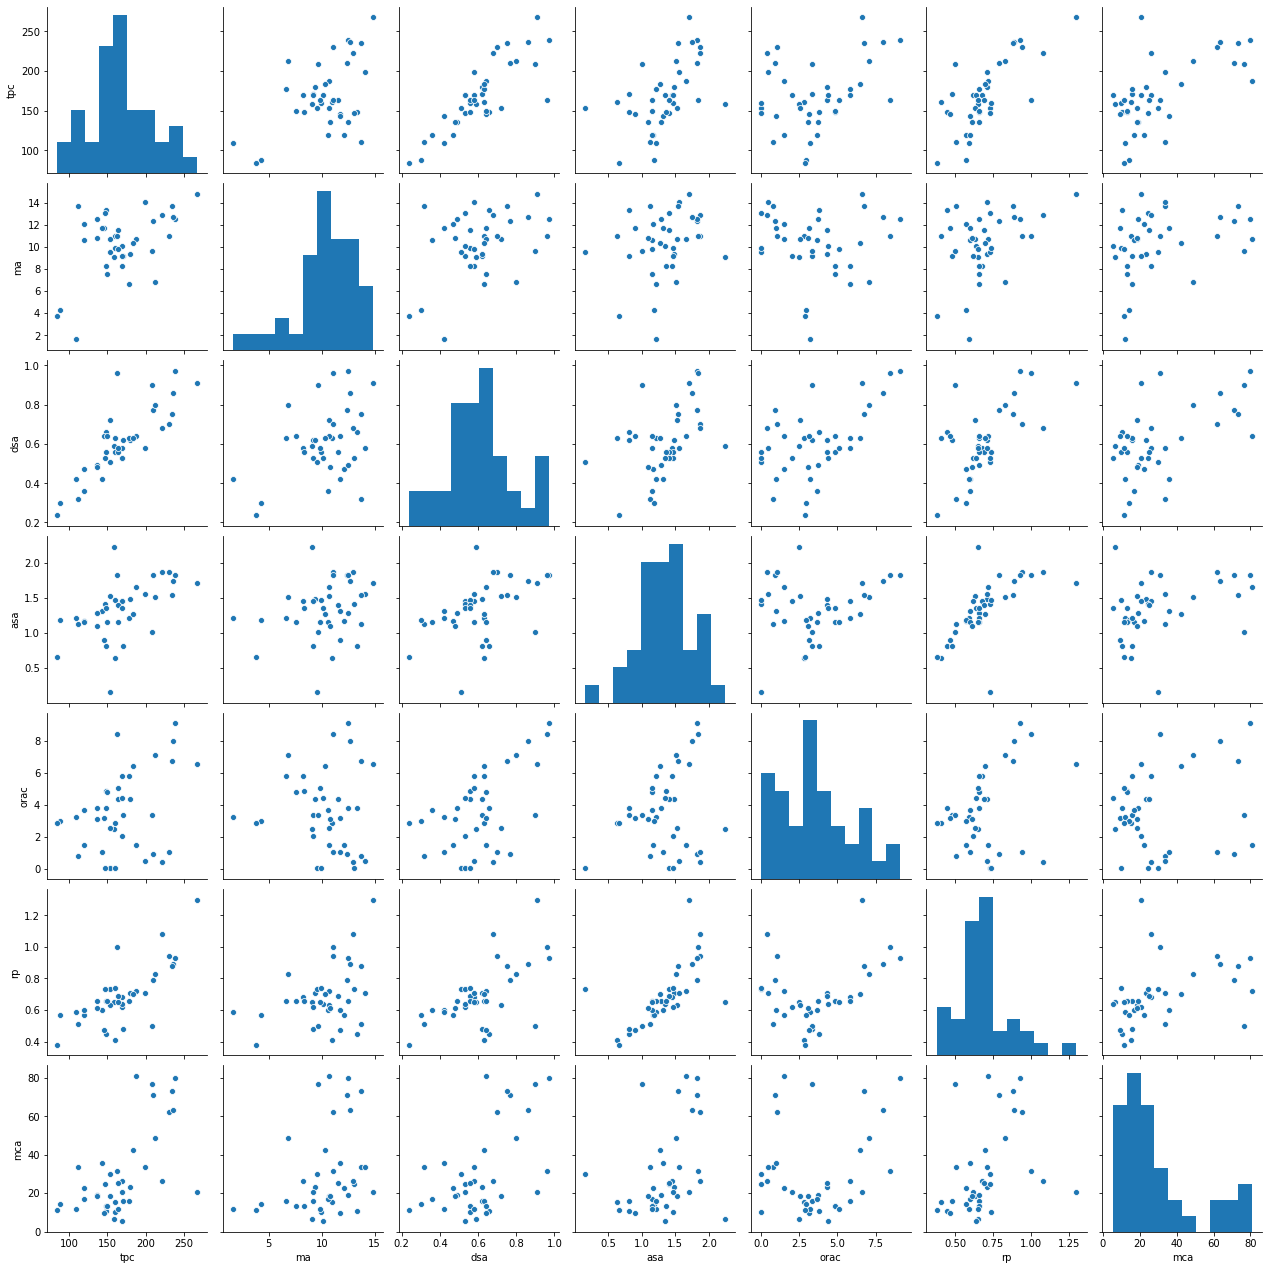

In [10]:
sns.pairplot(lager)
plt.show()

We would like to split the data into train and test samples. Use `tpc` as the y column and split the data with 25% of the data in the test sample.

In [11]:
X = lager.drop('tpc',axis = 1)
y = lager['tpc']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

Using sklearn, train the model and print out the coefficients and intercept.

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.score(X_train, y_train)

0.7650451728994555

In [19]:
model.score(X_test, y_test)

0.8850178457908691

In [23]:
X.head()

,ma,dsa,asa,orac,rp,mca
0,13.37,0.66,0.81,3.81,0.45,10.65
1,10.96,0.63,0.64,2.85,0.41,15.47
2,9.22,0.62,0.81,3.34,0.48,15.70
3,9.65,0.90,1.01,3.34,0.50,76.65
4,11.72,0.64,0.90,3.18,0.47,9.39


In [22]:
print(model.coef_)
print(model.intercept_)

[  1.27914897 110.83201716   4.14589374  -1.61969433  57.55850751
   0.47404448]
34.5840829822358
